In [1]:
%matplotlib inline
import torch
import torchvision
import torchvision.transforms as transforms
import matplotlib.pyplot as plt
import numpy as np
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim
import cv2

In [12]:
''' Load the dataset'''
transform = transforms.Compose(
    [transforms.ToTensor(),
     transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5))])

def load_dataset(data_path):
    train_dataset = torchvision.datasets.ImageFolder(
        root=data_path,
        transform=transform,
    )
    train_loader = torch.utils.data.DataLoader(
        train_dataset,
        batch_size=64,
        shuffle=True
    )
    return train_loader

In [13]:
'''Get the data loaders for each type of data'''
dataloader = load_dataset('../data')

In [16]:
dataloader.dataset

Dataset ImageFolder
    Number of datapoints: 202599
    Root Location: ../data
    Transforms (if any): Compose(
                             ToTensor()
                             Normalize(mean=(0.5, 0.5, 0.5), std=(0.5, 0.5, 0.5))
                         )
    Target Transforms (if any): None

(218, 178, 3)


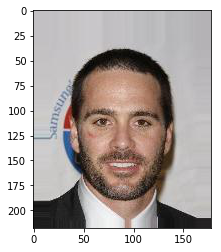

torch.Size([64, 3, 218, 178])

In [5]:
''' View image's '''
trainloader = dataloader
def imshow(img):
    img = img / 2 + 0.5     # unnormalize
    npimg = img.numpy()
    test = np.transpose(npimg, (1, 2, 0))
    print(test.shape)
    plt.imshow(test)
    plt.show()

# get some random training images
dataiter = iter(trainloader)
images, labels = dataiter.next()

# show images
imshow(images[8])
images.shape

In [6]:
def getCanny(image):
    nmp = image.numpy()
    nmp = np.transpose(nmp, (1, 2, 0))
    nmp = np.uint8(nmp)
    nmp = cv2.Canny(nmp, 218, 178)
    return nmp

In [7]:
getCanny(images[9]).reshape([1, 218,  178])

array([[[  0,   0,   0, ...,   0,   0,   0],
        [  0,   0,   0, ...,   0,   0,   0],
        [  0,   0,   0, ...,   0,   0,   0],
        ...,
        [255, 255, 255, ...,   0, 255,   0],
        [  0,   0, 255, ...,   0,   0, 255],
        [255, 255, 255, ..., 255,   0,   0]]], dtype=uint8)

In [8]:
test = np.transpose(test, (1, 2, 0))
test = np.uint8(test)

NameError: name 'test' is not defined

In [81]:
images.shape

torch.Size([64, 3, 218, 178])

In [9]:
val = cv2.Canny(test, 218, 178)

NameError: name 'test' is not defined

In [10]:
''' Build the neural network'''
class Net(nn.Module):
    def __init__(self):
        super(Net, self).__init__()
        ## Conv Blocks
        self.Conv2dBlock1 = nn.Sequential(
            nn.Conv2d(1, 64, kernel_size=3, stride=1, padding=1),
            nn.ReLU(True),
            nn.Conv2d(64, 64, kernel_size=3, stride=1, padding=1),
            nn.ReLU(True),
            nn.MaxPool2d(kernel_size=2)
        )
        self.Conv2dBlock2 = nn.Sequential(
            nn.Conv2d(64, 128, kernel_size=3, stride=1, padding=1),
            nn.ReLU(True),
            nn.Conv2d(128, 128, kernel_size=3, stride=1, padding=1),
            nn.ReLU(True),
            nn.MaxPool2d(kernel_size=2)
        )
        self.Conv2dBlock3 = nn.Sequential(
            nn.Conv2d(128, 256, kernel_size=3, stride=1, padding=1),
            nn.ReLU(True),
            nn.Conv2d(256, 256, kernel_size=3, stride=1, padding=1),
            nn.ReLU(True),
            nn.MaxPool2d(kernel_size=2)
        )
        ## Transposed block
        self.TransposedConv = nn.Sequential(
            nn.ConvTranspose2d(256, 128, kernel_size=2, stride=2),
            nn.ReLU(True),
            nn.ConvTranspose2d(128, 64, kernel_size=3, stride=2),
            nn.ReLU(True),
            nn.ConvTranspose2d(64, 3, kernel_size=2, stride=2),
        )  
        
    def forward(self, x):
        x = self.Conv2dBlock1(x)
        x = self.Conv2dBlock2(x)
        x = self.Conv2dBlock3(x)
        x = self.TransposedConv(x)
        return x     
net = Net()

criterion = nn.MSELoss()
optimizer = optim.SGD(net.parameters(), lr=0.001, momentum=0.9)

In [176]:
torch.tensor([getCanny(x).reshape([1,218,178]) for x in images]).size()

torch.Size([64, 1, 218, 178])

In [177]:
inputs.shape

torch.Size([64, 3, 218, 178])

In [11]:
for i, data in enumerate(trainloader, 0):
    inputs, labels = data
    optimizer.zero_grad()
    # forward + backward + optimize
    print(inputs.shape)
    edges = torch.tensor([getCanny(x).reshape([1,218,178]) for x in inputs]).float()
    outputs = net(edges)
    loss = criterion(outputs, inputs)
    loss.backward()
    optimizer.step()
    break

torch.Size([64, 3, 218, 178])


KeyboardInterrupt: 

In [97]:
inputs.shape

torch.Size([64, 1, 218, 178])

In [101]:
f = net.forward()

TypeError: forward() missing 1 required positional argument: 'x'

In [124]:
val = net(inputs)

In [125]:
val.shape

torch.Size([64, 3, 218, 178])

In [144]:
val3 = val.detach().numpy()

In [146]:
val3.shape

(64, 3, 218, 178)

In [157]:
val3[1].shape

(3, 218, 178)

In [180]:
def imshow2(img):
    img = img / 2 + 0.5     # unnormalize
    npimg = img
    test = np.transpose(npimg, (1, 2, 0))
    print(test.shape)
    plt.imshow(test)
    plt.show()

(218, 178, 3)


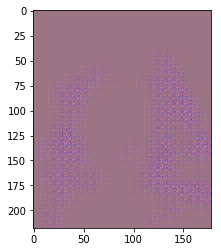

In [181]:
imshow2(val3[1])

(218, 178, 3)


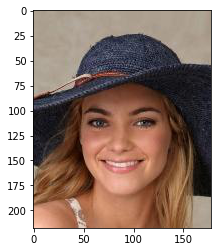

In [182]:
imshow(inputs[1])